In [71]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

import time
import pandas as pd

browser = webdriver.Chrome() #(ChromeDriverManager().install())

url1 = '''https://en.tripadvisor.com.hk/Hotel_Review-g294217-d302040-Reviews-or110-The_Peninsula_Hong_Kong-Hong_Kong.html#REVIEWS'''

browser.get(url1)
browser.find_element(By.XPATH, ".//div[contains(@data-test-target, 'review-tab')]").click()

#browser.implicitly_wait(20)
#link = browser.find_element_by_link_text('Read more')
#ActionChains(browser).move_to_element(link).perform
#link.click
#browser.find_element_by_class_name('ui_icon caret-down Lvqmo').click()
#view_more_elements = WebDriverWait(browser, 50).until(EC.visibility_of_all_elements_located(By.XPATH, '//*[@id="component_15"]/div/div[3]/div[3]/div[3]/div[3]/div[1]/div[2]/div'))
#view_more_elements.click()

#time.sleep(10)

html = browser.page_source

table_object = browser.find_element(By.XPATH,'//*[@id="component_15"]/div/div[3]/div[3]/div[3]/div[3]/div[1]/div[1]/q/span')
table_html = table_object.get_attribute('innerHTML')

table_html

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[contains(@data-test-target, 'review-tab')]"}
  (Session info: chrome=111.0.5563.64)
Stacktrace:
0   chromedriver                        0x0000000102f85428 chromedriver + 4899880
1   chromedriver                        0x0000000102f02a23 chromedriver + 4364835
2   chromedriver                        0x0000000102b4cbf6 chromedriver + 474102
3   chromedriver                        0x0000000102b904f0 chromedriver + 750832
4   chromedriver                        0x0000000102b90751 chromedriver + 751441
5   chromedriver                        0x0000000102bd4834 chromedriver + 1030196
6   chromedriver                        0x0000000102bb658d chromedriver + 906637
7   chromedriver                        0x0000000102bd1b5b chromedriver + 1018715
8   chromedriver                        0x0000000102bb6333 chromedriver + 906035
9   chromedriver                        0x0000000102b8055f chromedriver + 685407
10  chromedriver                        0x0000000102b81a7e chromedriver + 690814
11  chromedriver                        0x0000000102f5279e chromedriver + 4691870
12  chromedriver                        0x0000000102f57961 chromedriver + 4712801
13  chromedriver                        0x0000000102f5e2ff chromedriver + 4739839
14  chromedriver                        0x0000000102f5885a chromedriver + 4716634
15  chromedriver                        0x0000000102f2afce chromedriver + 4530126
16  chromedriver                        0x0000000102f785c8 chromedriver + 4847048
17  chromedriver                        0x0000000102f78747 chromedriver + 4847431
18  chromedriver                        0x0000000102f8d87f chromedriver + 4933759
19  libsystem_pthread.dylib             0x00007ff813fed4e1 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff813fe8f6b thread_start + 15


In [85]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException
import pandas as pd
import time

#chrome_path = r"C:\Users\hpoddar\Desktop\Tools\chromedriver_win32\chromedriver.exe"
#s = Service(chrome_path)
url = 'https://www.tripadvisor.com/Hotel_Review-g562644-d1490165-Reviews-Parador_de_Alcala_de_Henares-Alcala_De_Henares.html'
driver = webdriver.Chrome()
driver.get(url)

df = pd.DataFrame(columns = ['title', 'review'])
while True:
    time.sleep(2)
    reviews = driver.find_elements(by=By.CSS_SELECTOR, value='.WAllg._T')
    for review in reviews:
        title = review.find_element(by=By.CSS_SELECTOR, value='.KgQgP.MC._S.b.S6.H5._a').text
        review = review.find_element(by=By.CSS_SELECTOR, value='.fIrGe._T').text
        df.loc[len(df)] = [title, review]
    try:
        driver.find_element(by=By.CSS_SELECTOR, value='.ui_button.nav.next.primary').click()
    except ElementClickInterceptedException:
        break

df.to_csv("MyData.csv")

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=111.0.5563.64)
Stacktrace:
0   chromedriver                        0x0000000100509428 chromedriver + 4899880
1   chromedriver                        0x0000000100486a23 chromedriver + 4364835
2   chromedriver                        0x00000001000d0bf6 chromedriver + 474102
3   chromedriver                        0x00000001000d4c94 chromedriver + 490644
4   chromedriver                        0x00000001000d4876 chromedriver + 489590
5   chromedriver                        0x00000001000d4d1c chromedriver + 490780
6   chromedriver                        0x000000010010ccf5 chromedriver + 720117
7   chromedriver                        0x000000010013a562 chromedriver + 906594
8   chromedriver                        0x0000000100106361 chromedriver + 693089
9   chromedriver                        0x000000010013a71e chromedriver + 907038
10  chromedriver                        0x0000000100155b5b chromedriver + 1018715
11  chromedriver                        0x000000010013a333 chromedriver + 906035
12  chromedriver                        0x000000010010455f chromedriver + 685407
13  chromedriver                        0x0000000100105a7e chromedriver + 690814
14  chromedriver                        0x00000001004d679e chromedriver + 4691870
15  chromedriver                        0x00000001004db961 chromedriver + 4712801
16  chromedriver                        0x00000001004e22ff chromedriver + 4739839
17  chromedriver                        0x00000001004dc85a chromedriver + 4716634
18  chromedriver                        0x00000001004aefce chromedriver + 4530126
19  chromedriver                        0x00000001004fc5c8 chromedriver + 4847048
20  chromedriver                        0x00000001004fc747 chromedriver + 4847431
21  chromedriver                        0x000000010051187f chromedriver + 4933759
22  libsystem_pthread.dylib             0x00007ff813fed4e1 _pthread_start + 125
23  libsystem_pthread.dylib             0x00007ff813fe8f6b thread_start + 15


In [18]:
#====================
#import csv
#with open(‘reviews.csv’, ‘w’, newline=”) as file:
#writer = csv.writer(file)
#writer.writerow([‘Review Text’, ‘Review Rating’])
 
#for review in reviews:
#    review_text = review[0].replace(‘\n’, ”).strip()
#    review_rating = int(review[1]) / 10
#    writer.writerow([review_text, review_rating])

#====================
# ok => el=browser.find_element(By.XPATH,value = '//*[@id="component_15"]/div/div[3]/div[3]/div[3]/div[3]/div[1]')
#el=browser.find_element(by = By.CSS_SELECTOR,value = '._T.FKffI.bmUTE')

#action = webdriver.common.action_chains.ActionChains(browser)
#action.move_to_element_with_offset(el, 5, 5)
#action.click()
#action.perform()

#====================
#html = browser.page_source

#table_object = browser.find_element(By.XPATH,'//*[@id="component_15"]/div/div[3]/div[3]/div[3]/div[3]/div[1]/div[1]/q/span')
#table_html = table_object.get_attribute('innerHTML')

#table_html
#=======================


In [6]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

import time
import pandas as pd

browser = webdriver.Chrome() #(ChromeDriverManager().install())

url1 = '''https://en.tripadvisor.com.hk/Hotel_Review-g294217-d302040-Reviews-or1000-The_Peninsula_Hong_Kong-Hong_Kong.html'''
#url1 = '''https://en.tripadvisor.com.hk/Hotel_Review-g294217-d302040-Reviews-The_Peninsula_Hong_Kong-Hong_Kong.html'''

browser.get(url1)
time.sleep(20)

df = pd.DataFrame(columns = ['date','rating', 'title', 'review'])
while True:
    time.sleep(2)

    browser.execute_script("arguments[0].click();", WebDriverWait(browser, 20).until(EC.element_to_be_clickable((By.XPATH, '//span[@class="Ignyf _S Z"]'))))

    #reviews = browser.find_elements(by=By.CSS_SELECTOR, value='.WAllg._T')
    reviews = browser.find_elements(by=By.CSS_SELECTOR, value='.YibKl.MC.R2.Gi.z.Z.BB.pBbQr')
    
    for review in reviews:
        date = review.find_element(by=By.CSS_SELECTOR, value='.teHYY._R.Me.S4.H3').text
        rating = review.find_element(by=By.XPATH, value = ".//span[contains(@class, 'ui_bubble_rating bubble_')]").get_attribute("class").split("_")[3]
        #rating = review.find_element(by=By.CSS_SELECTOR, value='.ui_bubble_rating bubble_').get_attribute("class").split("_")[3]
        title = review.find_element(by=By.CSS_SELECTOR, value='.KgQgP.MC._S.b.S6.H5._a').text
        review = review.find_element(by=By.CSS_SELECTOR, value='.fIrGe._T').text
        
        df.loc[len(df)] = [date, rating, title, review]
    try:
        browser.find_element(by=By.CSS_SELECTOR, value='.ui_button.nav.next.primary').click()

    except ElementClickInterceptedException:
        break

#df.to_csv("tripadvisor_1000_to_1500.csv")

NameError: name 'ElementClickInterceptedException' is not defined

In [246]:
#=============================

import numpy as np 
import pandas as pd

# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
#nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus = []
 
# 1000 (reviews) rows to clean
for i in range(0, 1000):
     
    # column : "Review", row ith
    Review = re.sub('[^a-zA-Z]', ' ', dfa['review'][i])
     
    # convert all cases to lower cases
    Review = Review.lower()
     
    # split to array(default delimiter is " ")
    Review = Review.split()
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word
    # in string array at ith row   
    Review = [ps.stem(word) for word in Review
                if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements
    # to create back into a string
    Review = ' '.join(Review) 
     
    # append each string to create
    # array of clean text
    corpus.append(Review)

dfs = df[df['review'].map(lambda x: x.isascii())]

dfa['rating'] = pd.to_numeric(dfa['rating'])

dfa["is_bad_review"] = dfa["rating"].apply(lambda x: 1 if x < 30 else 0)


from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 3000)
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
 
# y contains answers if review
# is positive or negative
y = dfa.iloc[:, 5].values

from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestClassifier
 
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                             
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
 
y_pred

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
 
cm

#=============================

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [9]:
#https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


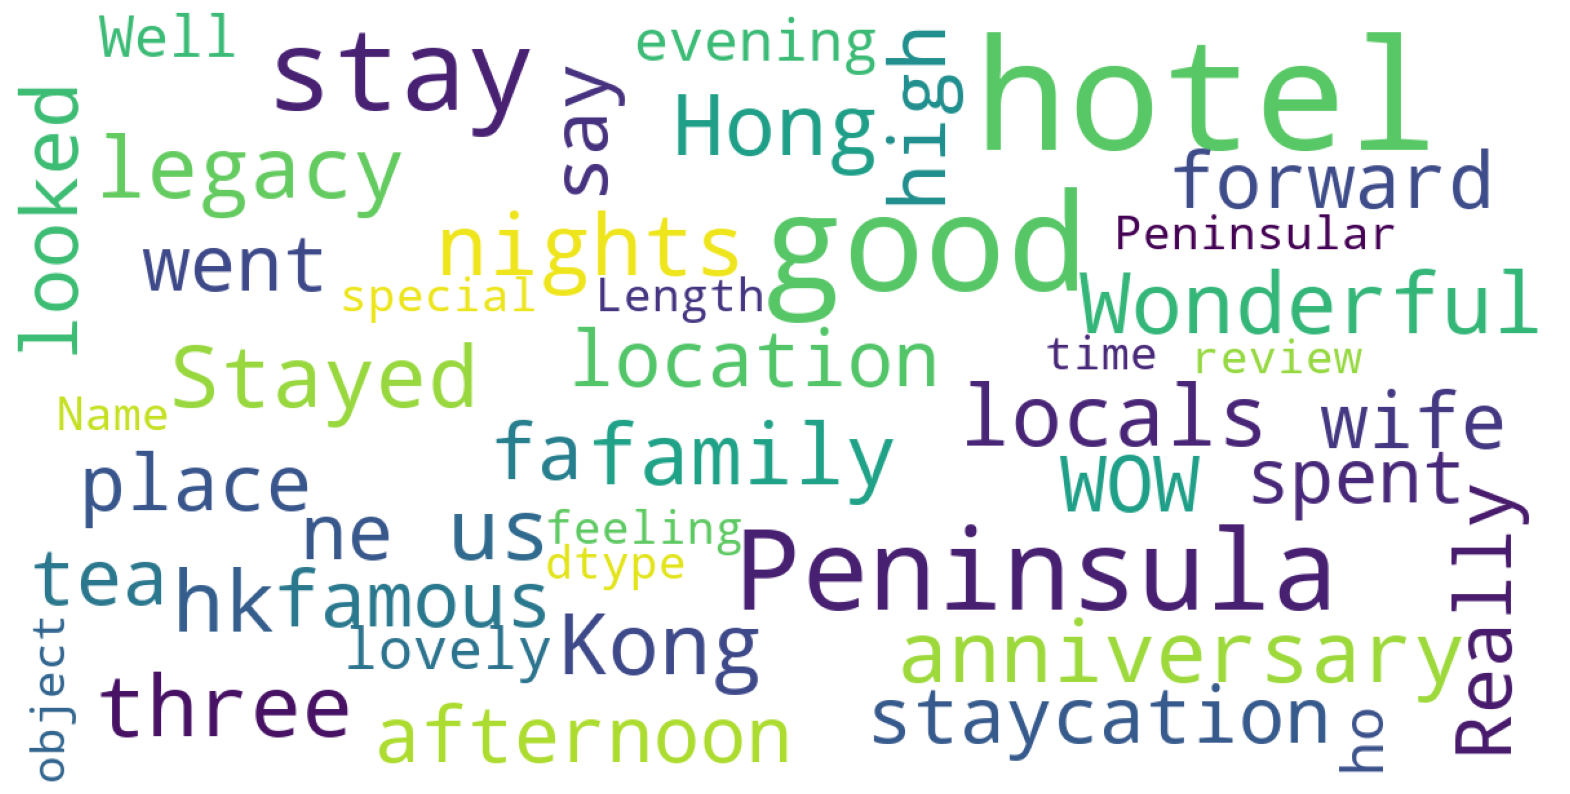

In [26]:
import pandas as pd

dfa = df.copy()
dfa['rating'] = pd.to_numeric(df['rating'])

# create the label
dfa["is_bad_review"] = dfa["rating"].apply(lambda x: 1 if x < 30 else 0)
# select only relevant columns
dfa = dfa[["review", "is_bad_review"]]
dfa.head()

#dfa = dfa.drop(['index','date','rating','title'],axis =1)
#dfa = dfa.loc[:,~dfa.columns.duplicated()].copy()

# clean text data
dfa["review_clean"] = dfa["review"].apply(lambda x: clean_text(x))

# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
dfa["sentiments"] = dfa["review"].apply(lambda x: sid.polarity_scores(x))
dfa = pd.concat([dfa.drop(['sentiments'], axis=1), dfa['sentiments'].apply(pd.Series)], axis=1)

# add number of characters column
dfa["nb_chars"] = dfa["review"].apply(lambda x: len(x))

# add number of words column
dfa["nb_words"] = dfa["review"].apply(lambda x: len(x.split(" ")))

# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dfa["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = dfa["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([dfa, doc2vec_df], axis=1)

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 5) # 10 to 5
tfidf_result = tfidf.fit_transform(dfa["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = dfa.index
dfa = pd.concat([dfa, tfidf_df], axis=1)

# show is_bad_review distribution
dfa["is_bad_review"].value_counts(normalize = True)

# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(dfa["review"])

/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


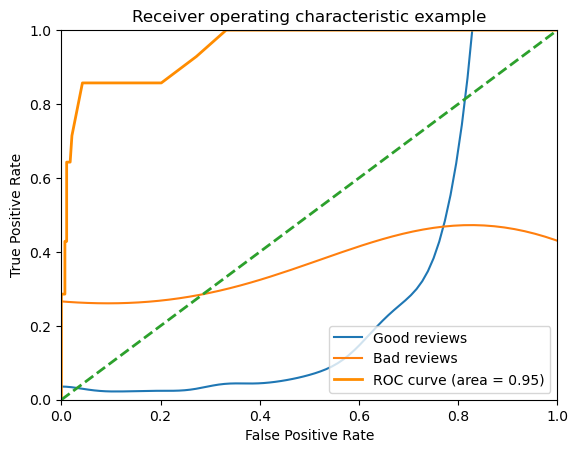

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

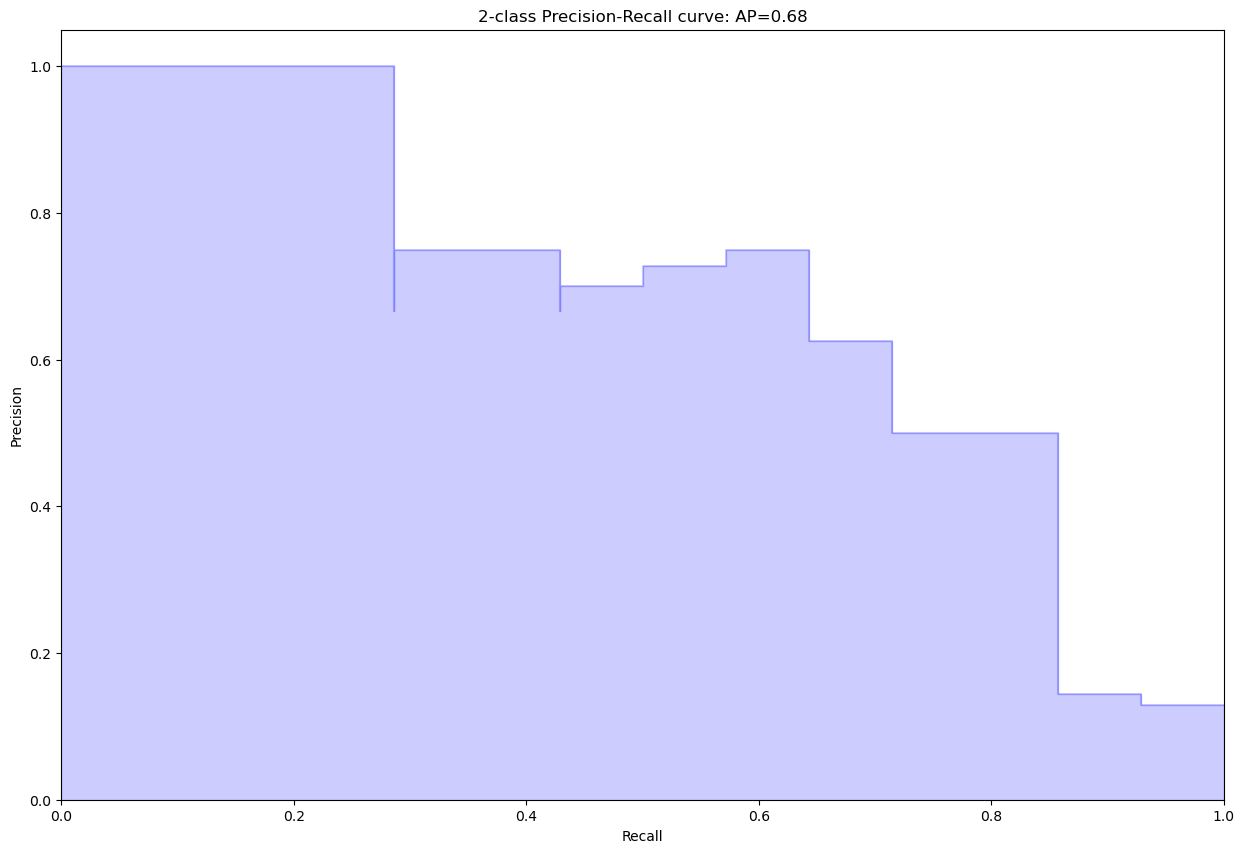

In [27]:
dfa[dfa["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

# lowest negative sentiment reviews (with more than 5 words)
dfa[dfa["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

# plot sentiment distribution for positive and negative reviews
import seaborn as sns

for x in [0, 1]:
    subset = dfa[dfa['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
    
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in dfa.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfa[features], dfa[label], test_size = 0.20, random_state = 42)

# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

# ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

#dfa = dfa.loc[:,~dfa.columns.duplicated()].copy()
#feature_importances_df.head(20)
#df1 = pd.read_csv('tripadvisor_PenHK_1_to_990.csv')
#df2 = pd.read_csv('tripadvisor_PenHK_1000_to_1500.csv')
#df_merged = df1.merge(df2, how='outer')
#df = df_merged.drop(df_merged.columns[[0]], axis=1) 
